In [4]:
import dask.dataframe as dd

# Example: Read a big CSV file
df = dd.read_csv('flight.csv')

# Peek at the data
print(df.head())
print(df.columns)
print(df.dtypes)


   Year  Month  Day  DayOfWeek Flight_Date UniqueCarrier Tai_lNum  FlightNum  \
0  2016      7    1          5  01/07/2016            AA   N793AA          1   
1  2016      7    2          6  02/07/2016            AA   N784AA          1   
2  2016      7    4          1  04/07/2016            AA   N785AA          1   
3  2016      7    5          2  05/07/2016            AA   N790AA          1   
4  2016      7    6          3  06/07/2016            AA   N799AA          1   

  Origin_Airport Origin_City_Name  ... Carrier_Delay  WeatherDelay  NAS_Delay  \
0            BOS       Boston, MA  ...             0             0          0   
1            BOS       Boston, MA  ...             0             0          0   
2            BOS       Boston, MA  ...             0             0          0   
3            BOS       Boston, MA  ...             0             0          0   
4            BOS       Boston, MA  ...             0             0          0   

   Security_Delay  Late_Aircraft

In [6]:
#Average Arrival Delay per Airline
avg_arrival_delay = df.groupby('UniqueCarrier')['Arrival_Delay'].mean().compute()
print(avg_arrival_delay.sort_values(ascending=False))


UniqueCarrier
AA    19.459863
Name: Arrival_Delay, dtype: float64


In [7]:
#Delay Rate – % of Flights Delayed Over 15 Minutes
delay_rate = df.groupby('UniqueCarrier')['Arr_Del_morethan15'].mean().compute() * 100
print(delay_rate.sort_values(ascending=False))


UniqueCarrier
AA    32.213234
Name: Arr_Del_morethan15, dtype: float64


In [8]:
total_flights = df['UniqueCarrier'].value_counts().compute()
delayed_flights = df[df['Arr_Del_morethan15'] == 1]['UniqueCarrier'].value_counts().compute()

delay_df = (delayed_flights / total_flights * 100).sort_values(ascending=False)
print(delay_df)


UniqueCarrier
AA    32.213234
Name: count, dtype: double[pyarrow]


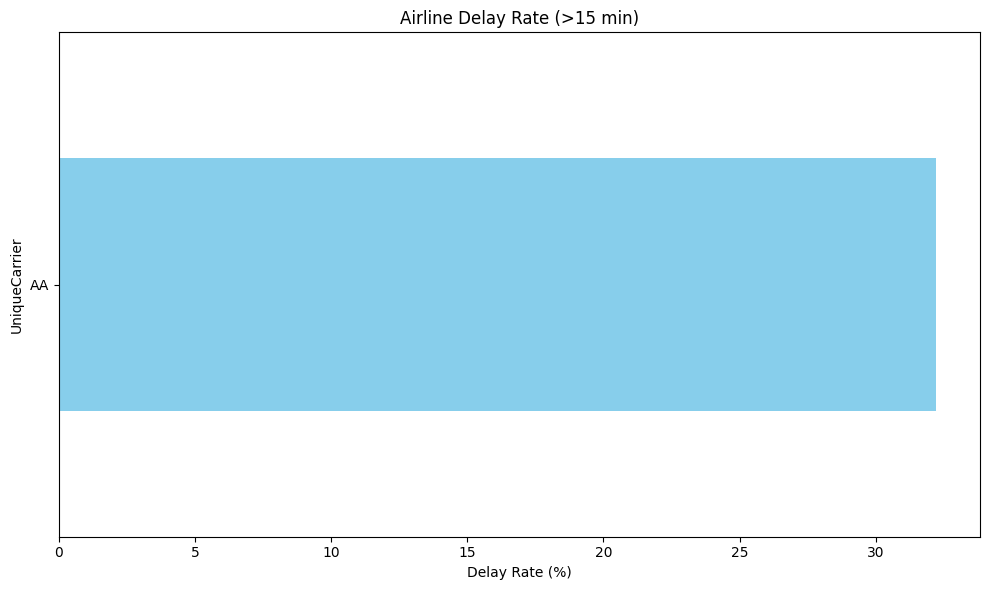

In [9]:
#Visualize the Patterns
import matplotlib.pyplot as plt

delay_rate.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Delay Rate (%)')
plt.title('Airline Delay Rate (>15 min)')
plt.tight_layout()
plt.show()


In [10]:
#Analyze Delay Trends by Month
monthly_delay = df.groupby('Month')['Arrival_Delay'].mean().compute()
print(monthly_delay.sort_values(ascending=False))


Month
7    19.459863
Name: Arrival_Delay, dtype: float64


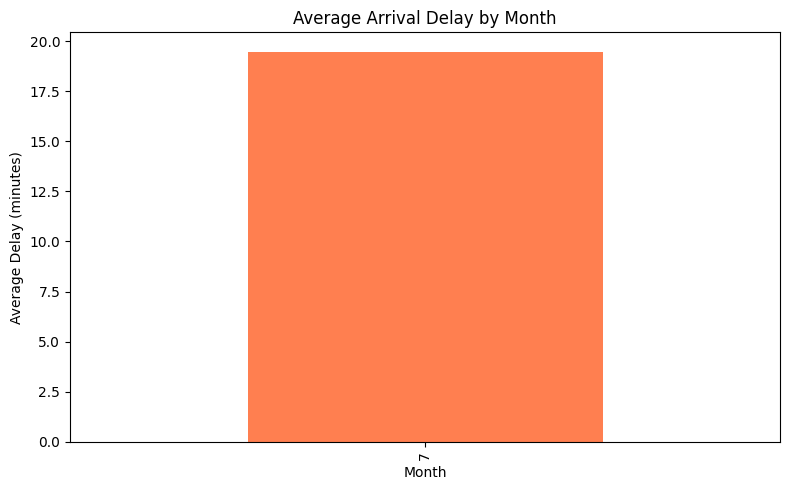

In [11]:
import matplotlib.pyplot as plt

monthly_delay.sort_index().plot(kind='bar', color='coral', figsize=(8,5))
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()


In [12]:
#Delay Patterns by Day of the Week
weekday_delay = df.groupby('DayOfWeek')['Arrival_Delay'].mean().compute()
print(weekday_delay.sort_values(ascending=False))


DayOfWeek
5    31.462131
4    28.208138
1    20.095847
7    19.667934
6    13.208274
2    10.828660
3    10.810853
Name: Arrival_Delay, dtype: float64


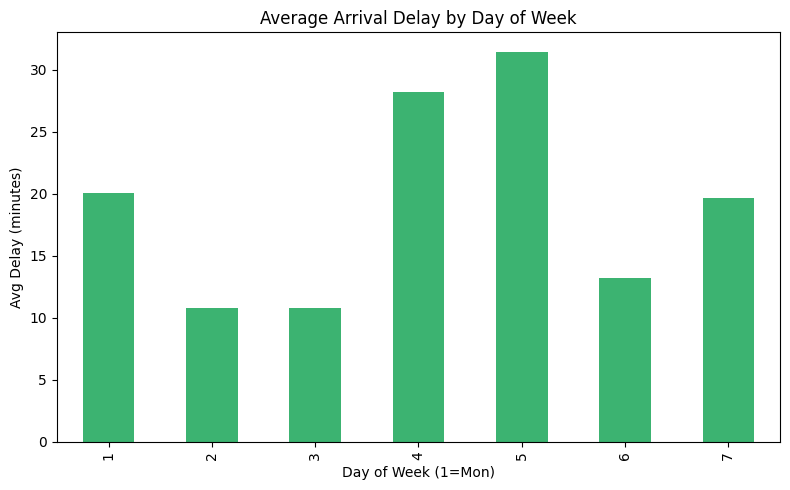

In [13]:
weekday_delay.sort_index().plot(kind='bar', color='mediumseagreen', figsize=(8,5))
plt.title('Average Arrival Delay by Day of Week')
plt.xlabel('Day of Week (1=Mon)')
plt.ylabel('Avg Delay (minutes)')
plt.tight_layout()
plt.show()


In [14]:
#Average Arrival Delay by Airline and Month
avg_delay_airline_month = df.groupby(['UniqueCarrier', 'Month'])['Arrival_Delay'].mean().compute()
print(avg_delay_airline_month.sort_values(ascending=False))


UniqueCarrier  Month
AA             7        19.459863
Name: Arrival_Delay, dtype: float64


In [15]:
#Average Delay Time by Cause (Overall)
causes = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']
avg_cause_delay = df[causes].mean().compute()
print(avg_cause_delay.sort_values(ascending=False))


Late_Aircraft_Delay    8.968056
Carrier_Delay          7.505497
NAS_Delay              6.816013
WeatherDelay           1.382493
Security_Delay         0.051442
dtype: float64


In [16]:
#Total Delay Minutes by Cause
total_cause_delay = df[causes].sum().compute()
print(total_cause_delay.sort_values(ascending=False))


Late_Aircraft_Delay    43235
Carrier_Delay          36184
NAS_Delay              32860
WeatherDelay            6665
Security_Delay           248
dtype: int64


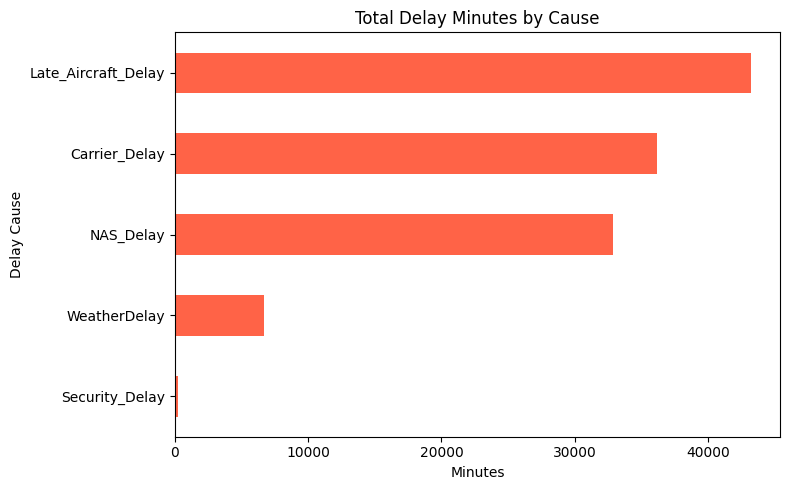

In [17]:
import matplotlib.pyplot as plt

total_cause_delay.sort_values().plot(kind='barh', figsize=(8,5), color='tomato')
plt.title('Total Delay Minutes by Cause')
plt.xlabel('Minutes')
plt.ylabel('Delay Cause')
plt.tight_layout()
plt.show()


In [18]:
df['UniqueCarrier'].value_counts().compute()


UniqueCarrier
AA    4821
Name: count, dtype: int64[pyarrow]